In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import numpy as np 
from sklearn.metrics import RocCurveDisplay

df=pd.read_csv("AAPL.csv")
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [66]:
df.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [68]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,58.485714,58.928570,58.428570,58.747143,50.857235,75555200
1,2012-01-04,58.571430,59.240002,58.468571,59.062859,51.130558,65005500
2,2012-01-05,59.278572,59.792858,58.952858,59.718571,51.698215,67817400
3,2012-01-06,59.967144,60.392857,59.888573,60.342857,52.238651,79573200
4,2012-01-09,60.785713,61.107143,60.192856,60.247143,52.155792,98506100


In [70]:
df.shape

(2110, 7)

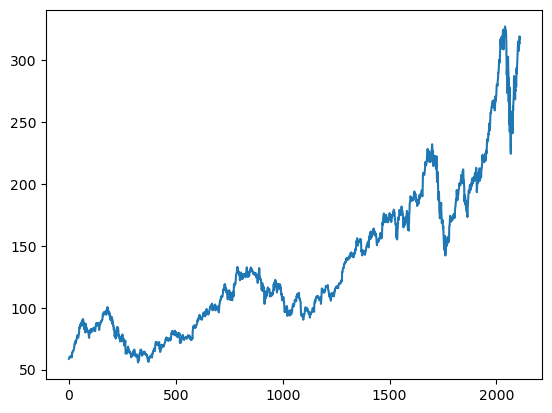

In [72]:
df1 = df["Close"].replace({r'\$':''}, regex=True).astype(float)
plt.plot(df1)
plt.show()

In [74]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

training_Size=int(len(df1)*0.7)
test_size=len(df1)-training_Size
train_data,test_data=df1[0:training_Size,:],df1[training_Size:len(df1),:1]
training_Size,test_size

(1477, 633)

In [76]:
def dataset(data,time_stamp=1):
    dataX,dataY=[],[]
    for i in range(len(data)-time_stamp-1):
        a=data[i:(i+time_stamp),0]
        dataX.append(a)
        dataY.append(data[i+time_stamp,0])
    return np.array(dataX),np.array(dataY)


In [78]:
time_stamp=100
X_train,Y_train= dataset(train_data,time_stamp)
X_test,Y_test=dataset(test_data,time_stamp)

In [80]:
print(X_train)
print(X_train.shape)

[[0.01089548 0.01205872 0.01447467 ... 0.087606   0.09475909 0.09200103]
 [0.01205872 0.01447467 0.01677483 ... 0.09475909 0.09200103 0.09040617]
 [0.01447467 0.01677483 0.01642217 ... 0.09200103 0.09040617 0.09565915]
 ...
 [0.33362806 0.32872772 0.33189636 ... 0.43001361 0.43646142 0.43852471]
 [0.32872772 0.33189636 0.33101212 ... 0.43646142 0.43852471 0.44379352]
 [0.33189636 0.33101212 0.333407   ... 0.43852471 0.44379352 0.44246711]]
(1376, 100)


In [82]:
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [84]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Input

In [86]:
model = Sequential()
model.add(Input(shape=(100, 1)))   # instead of input_shape in LSTM
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_27 (LSTM)                       │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_28 (LSTM)                       │ (None, 100, 50)             │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_29 (LSTM)                       │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.fit(X_train,Y_train,validation_data=(X_test,Y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 9s 189ms/step - loss: 0.0064 - val_loss: 0.0034
Epoch 2/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 4s 161ms/step - loss: 6.0227e-04 - val_loss: 0.0028
Epoch 3/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 139ms/step - loss: 3.4885e-04 - val_loss: 0.0029
Epoch 4/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 129ms/step - loss: 2.8418e-04 - val_loss: 0.0026
Epoch 5/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 133ms/step - loss: 2.7509e-04 - val_loss: 0.0025
Epoch 6/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 124ms/step - loss: 2.7794e-04 - val_loss: 0.0027
Epoch 7/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 125ms/step - loss: 2.7607e-04 - val_loss: 0.0023
Epoch 8/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 139ms/step - loss: 2.6889e-04 - val_loss: 0.0023
Epoch 9/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 145ms/step - loss: 2.5803e-04 - val_loss: 0.0024
Epoch 10/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 4s 183ms/step - loss: 2.4571e-04 - val_loss: 0.0023
Epoch 11/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 5s 233ms/step - loss: 2.3690e-04 - val_loss: 0.0020
E

In [ ]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [ ]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [56]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(Y_train,train_predict))

31.737407016173076

In [57]:
math.sqrt(mean_squared_error(Y_test,test_predict))

139.65147555167562

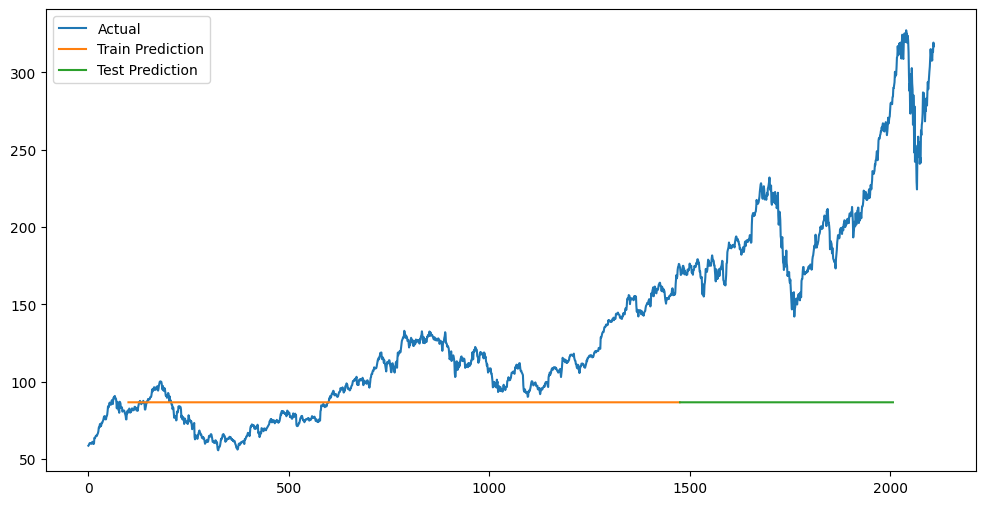

In [61]:
import numpy as np
import matplotlib.pyplot as plt

look_back = 100

train_predict_plot = np.empty_like(df1)
train_predict_plot[:, :] = np.nan
train_predict_plot[look_back:look_back+len(train_predict), :] = train_predict

test_predict_plot = np.empty_like(df1)
test_predict_plot[:, :] = np.nan
test_predict_plot[look_back+len(train_predict):look_back+len(train_predict)+len(test_predict), :] = test_predict

plt.figure(figsize=(12,6))
plt.plot(scaler.inverse_transform(df1), label="Actual")
plt.plot(train_predict_plot, label="Train Prediction")
plt.plot(test_predict_plot, label="Test Prediction")
plt.legend()
plt.show()


In [62]:
len(test_data)

633

In [64]:
x_input = test_data[7448:].reshape(-1, 1)
x_input = test_data[-100:].reshape(-1, 1)
print(x_input.shape)  

(100, 1)


In [67]:
tempinput=list(x_input)
tempinput=tempinput[0].tolist()

from numpy import array
lst_output=[]
n_steps=100
i=0
while(i<30):
    if(len(tempinput)>100):
        x_input=np.array(tempinput[1:])
        print("{} dat input".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input=x_input.reshape((1,n_steps,1))
        yhat=model.predict(x_input,verbose=0)
        tempinput.extend(yhat[0].tolist())
        tempinput=tempinput[1:]
        lst_output.extend(yhat[0].tolist())
        i=i+1
    else:
        x_input=x_input.reshape((1,n_steps,1))
        yhat=model.predict(x_input,verbose=0)
        print(yhat[0])
        tempinput.extend(yhat[0].tolist())
        print(len(tempinput))
        lst_output.extend(yhat[0].tolist())
        i=i+1
print(lst_output)        

[86.7977]
2
[86.7977]
3
[86.7977]
4
[86.7977]
5
[86.7977]
6
[86.7977]
7
[86.7977]
8
[86.7977]
9
[86.7977]
10
[86.7977]
11
[86.7977]
12
[86.7977]
13
[86.7977]
14
[86.7977]
15
[86.7977]
16
[86.7977]
17
[86.7977]
18
[86.7977]
19
[86.7977]
20
[86.7977]
21
[86.7977]
22
[86.7977]
23
[86.7977]
24
[86.7977]
25
[86.7977]
26
[86.7977]
27
[86.7977]
28
[86.7977]
29
[86.7977]
30
[86.7977]
31
[86.79769897460938, 86.79769897460938, 86.79769897460938, 86.79769897460938, 86.79769897460938, 86.79769897460938, 86.79769897460938, 86.79769897460938, 86.79769897460938, 86.79769897460938, 86.79769897460938, 86.79769897460938, 86.79769897460938, 86.79769897460938, 86.79769897460938, 86.79769897460938, 86.79769897460938, 86.79769897460938, 86.79769897460938, 86.79769897460938, 86.79769897460938, 86.79769897460938, 86.79769897460938, 86.79769897460938, 86.79769897460938, 86.79769897460938, 86.79769897460938, 86.79769897460938, 86.79769897460938, 86.79769897460938]


In [68]:
day_new=np.arange(1,101)
day_predict=np.arange(101,131)

In [69]:
len(df1)

2110

In [71]:
df3=df1.tolist()
df3.extend(lst_output)
lst_output = np.array(lst_output)

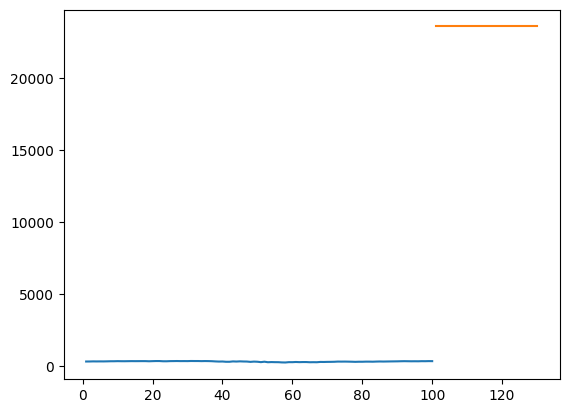

In [76]:
plt.plot(day_new,scaler.inverse_transform(df1[-100:].reshape(-1, 1)))
plt.plot(day_predict,scaler.inverse_transform(lst_output.reshape(-1, 1)))
plt.show()